In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import glob
import os
import matplotlib.pyplot as plt

%matplotlib inline

In [31]:
# daily trading report find on email

In [32]:
input_path = "/Users/ansonleung/Downloads"
output_file = "/Users/ansonleung/Desktop/daily_trading.xlsx"
all_files = glob.glob(os.path.join(input_path, 'daily_report*'))
all_data_frames = []
file_count = 0
for file in all_files:
    data_frame = pd.read_excel(file, sheet_name='Sheet1', index_col=None)
    file_count += 1

df = data_frame
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header
df=df.iloc[:,0:4]
df = df.dropna(how='all')
df = df[df['TradeType'] != 'REBALANCE_DRIFT']
df = df.replace(['SELL_ALL_OUT'],'SELL_OUT')

In [33]:
df['ProductId'] = df['ProductId'].apply(str)
product_list={'HKD': ['12', '32', '2306', '2310', '2170', '2130', '2160'],
 'USD': ['13','33','55','3110','3120','3210','3220','3310','3320','3180','3130','3140','3000'],
 'CNY': ['4410', '4510']}

In [34]:
usd_rate = 7.8
cny_rate = 1.2
hkd_rate = 1
df1 = df[df.ProductId.isin(product_list['USD'])].amount * usd_rate
df2 = df[df.ProductId.isin(product_list['CNY'])].amount * cny_rate
df3 = df[df.ProductId.isin(product_list['HKD'])].amount * hkd_rate
df['amount_in_hkd']=pd.concat([df1,df2,df3])
df = df.drop('amount',1)

In [35]:
product_legend2 = {
'12':'SG', '32':'SG',
'13':'SGM','33':'SGM',
'55':'SGX',
'3110':'Profit M.', '3120':'Profit M.',
'3210':'Bus. Win.','3220':'Bus. Win.',
'3310':'Glob T.','3320':'Glob T.',
'3180':'ESG',
'3130':'US Lead',
'3140':'Health',
'3000':'Cash',
'4410':'Blue C.', 
'4510':'Hidden G.',
'2306':'Chin Tech', '2310':'Chin Tech', 
'2170':'High Div', 
'2130':'HK Lead', 
'2160':'Prop M.'}
df = df.replace({'ProductId':product_legend2})
df=df.sort_values('TradeType')
df.sort_values('ProductId')
df1 = df.groupby(['ProductId','TradeType'],as_index=False)['count','amount_in_hkd'].sum()

<ipython-input-35-7aa585e5aa55>:21: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1 = df.groupby(['ProductId','TradeType'],as_index=False)['count','amount_in_hkd'].sum()


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

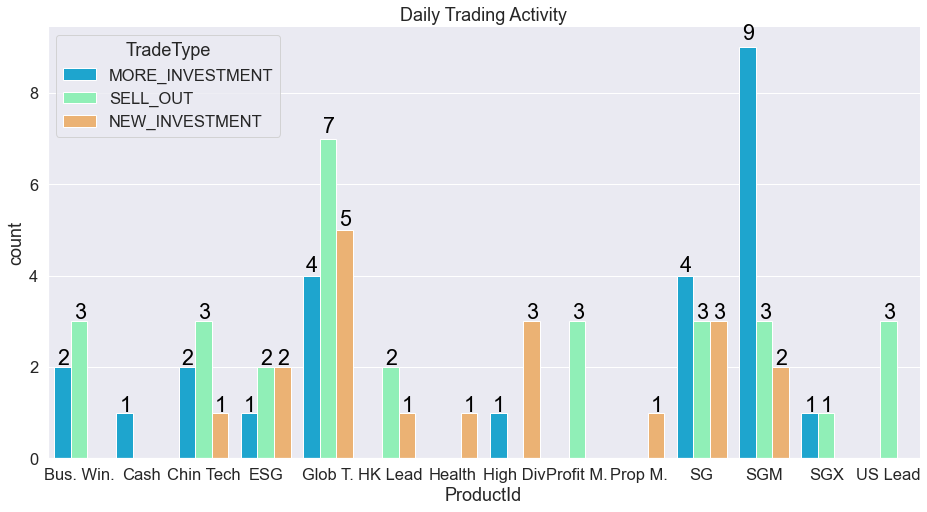

In [36]:
sns.set(font_scale=1.5)

g = sns.catplot(
    data=df1, kind="bar",
    x="ProductId", y="count", hue="TradeType",
    palette="rainbow",height=10,legend=True, legend_out=False
)

g.fig.set_size_inches(15,8)

g.fig.subplots_adjust(top=0.81,right=0.86) 

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x()+0.05, 
            p.get_height()*1.02, 
           '{:.0f}'.format(p.get_height()),   #Used to format it K representation
            color='black', 
            rotation='horizontal', 
            size='large')
ax.set_title("Daily Trading Activity")
g.savefig('/Users/ansonleung/Desktop/trade_count.png')
    

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

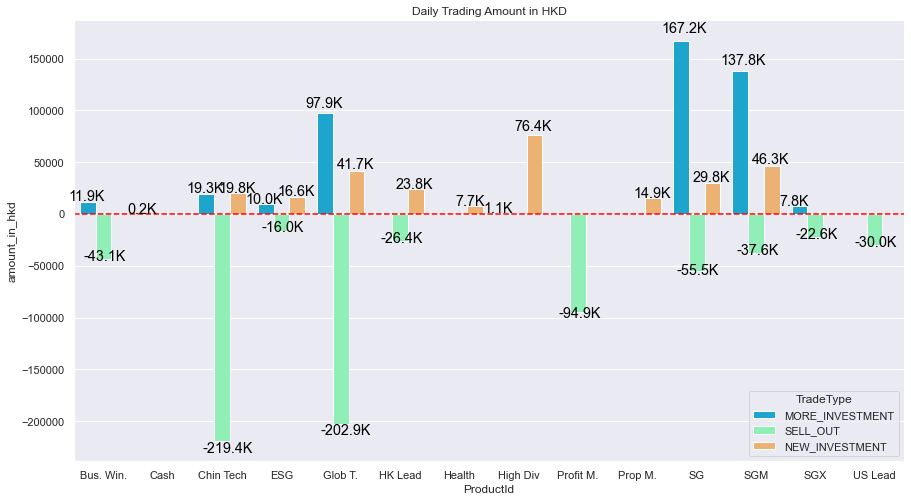

In [37]:
sns.set(font_scale=1)

g = sns.catplot(
    data=df1, kind="bar",
    x="ProductId", y="amount_in_hkd", hue="TradeType",
    palette="rainbow",height=10,legend_out=False
)
g.fig.set_size_inches(15,8)

g.fig.subplots_adjust(top=0.81,right=0.86) 

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x()-0.2, p.get_height() * 1.05+0.7,
            '{0:.1f}K'.format(p.get_height()/1000), 
              #Used to format it K representation
            color='black', 
            rotation='horizontal', 
            size='large')
ax.axhline(10, ls='--', c='red')
ax.set_title("Daily Trading Amount in HKD")
g.savefig('/Users/ansonleung/Desktop/trade_amount.png')


In [38]:
df1 = df.groupby(['ProductId','TradeType'])['amount_in_hkd'].sum()
df1 = pd.DataFrame(df1).round(2)
df1

amount_in_hkd
ProductId TradeType                     
Bus. Win. MORE_INVESTMENT       11924.72
          SELL_OUT             -43089.62
Cash      MORE_INVESTMENT         242.35
Chin Tech MORE_INVESTMENT       19284.08
          NEW_INVESTMENT        19828.82
          SELL_OUT            -219449.86
ESG       MORE_INVESTMENT        9975.11
          NEW_INVESTMENT        16561.12
          SELL_OUT             -16039.14
Glob T.   MORE_INVESTMENT       97857.63
          NEW_INVESTMENT        41746.69
          SELL_OUT            -202866.46
HK Lead   NEW_INVESTMENT        23820.04
          SELL_OUT             -26422.76
Health    NEW_INVESTMENT         7667.87
High Div  MORE_INVESTMENT        1072.70
          NEW_INVESTMENT        76375.67
Profit M. SELL_OUT             -94919.06
Prop M.   NEW_INVESTMENT        14895.41
SG        MORE_INVESTMENT      167158.66
          NEW_INVESTMENT        29776.37
          SELL_OUT             -55462.00
SGM       MORE_INVESTMENT      137781.31
          NEW_INVESTMENT        46257.28
          SELL_OUT             -37588.90
SGX       MORE_INVESTMENT        7794.62
          SELL_OUT             -22579.60
US Lead   SELL_OUT             -29972.59

In [39]:
df1.to_csv('/Users/ansonleung/Desktop/daily_trading.csv')

In [29]:

import pandas as pd
import csv
import glob
import os
import sys
import numpy as np
index = 0
input_path = '/Users/ansonleung/Downloads'
all_files = glob.glob(os.path.join(input_path, 'daily_report*'))
for i in all_files: 
    if os.path.exists(i):
        os.remove(i)
        index+=1
print(f'{index} files deleted')

1 files deleted
